<a href="https://colab.research.google.com/github/TasniaJuha/ML_Projects/blob/main/Na%C3%AFve_Bayes_Types_Example_%26_Explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naïve Bayes

A classifier is a machine learning model that is used to discriminate different objects based on certain features.

    

    Principle of Naive Bayes Classifier:
A Naive Bayes classifier is a probabilistic machine learning model that's used for classification task. The crux of the classifier is based on the Bayes theorem.


    Bayes Theorem:
  In probability theory and statistics, Bayes' theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event — Source: Wikipedia
    
\begin{align*}
P(A|B) &= \frac{P(B|A) \cdot P(A)}{P(B)} \\
       &= \frac{P(B|A) \cdot P(A)}{P(B|A) \cdot P(A) + P(B|\neg A) \cdot P(\neg A)}
\end{align*}


Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

# Types Of Naïve Bayes:

## Gaussian Naïve Bayes

Gaussian Naive Bayes is a machine learning classification technique based on a probablistic approach that assumes each class follows a normal distribution. It assumes each parameter has an independent capacity of predicting the output variable. It is able to predict the probability of a dependent variable to be classified in each group. When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution. It is used in simple classification with normal distributed data.
\begin{align*}
P(x_i|y) &= \frac{1}{\sqrt{2\pi\sigma_{yi}^2}} \exp\left(-\frac{(x_i - \mu_{yi})^2}{2\sigma_{yi}^2}\right)
\end{align*}



In [ ]:
from random import random
from random import randint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions

Now, we will create a database in which the predictive variables are normally distributed.

In [ ]:
#Creating values for FeNO with 3 classes:
FeNO_0 = np.random.normal(20, 19, 200)
FeNO_1 = np.random.normal(40, 20, 200)
FeNO_2 = np.random.normal(60, 20, 200)
#Creating values for FEV1 with 3 classes:
FEV1_0 = np.random.normal(4.65, 1, 200)
FEV1_1 = np.random.normal(3.75, 1.2, 200)
FEV1_2 = np.random.normal(2.85, 1.2, 200)
#Creating values for Broncho Dilation with 3 classes:
BD_0 = np.random.normal(150,49, 200)
BD_1 = np.random.normal(201,50, 200)
BD_2 = np.random.normal(251, 50, 200)
#Creating labels variable with three classes:(2)disease (1)possible disease (0)no disease:
not_asthma = np.zeros((200,), dtype=int)
poss_asthma = np.ones((200,), dtype=int)
asthma = np.full((200,), 2, dtype=int)
#Concatenate classes into one variable:
FeNO = np.concatenate([FeNO_0, FeNO_1, FeNO_2])
FEV1 = np.concatenate([FEV1_0, FEV1_1, FEV1_2])
BD = np.concatenate([BD_0, BD_1, BD_2])
dx = np.concatenate([not_asthma, poss_asthma, asthma])
#Create DataFrame:
df = pd.DataFrame()
#Add variables to DataFrame:
df['FeNO'] = FeNO.tolist()
df['FEV1'] = FEV1.tolist()
df['BD'] = BD.tolist()
df['dx'] = dx.tolist()
#Check database:
df

,FeNO,FEV1,BD,dx
0,39.525959,3.677159,177.204134,0
1,-6.273485,4.120138,154.429585,0
2,7.722294,2.639128,171.314297,0
3,15.540243,4.992759,94.970254,0
4,-2.289324,4.373464,213.798494,0
...,...,...,...,...
595,81.028577,1.986329,225.952106,2
596,71.412002,2.511354,253.832979,2
597,66.689338,2.707086,169.328209,2
598,70.332416,2.530483,306.449383,2


We have our data frame with 600 rows and four columns. Now, we can check the distribution of our variables by visual inspection:

<ipython-input-3-c40d980c0682>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['FEV1'], shade=True, color="b", ax=axs[0, 0])
<ipython-input-3-c40d980c0682>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['FeNO'], shade=True, color="b", ax=axs[0, 1])
<ipython-input-3-c40d980c0682>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['BD'], shade=True, color="b", ax=axs[0, 2])
<ipython-input-3-c40d980c0682>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an a

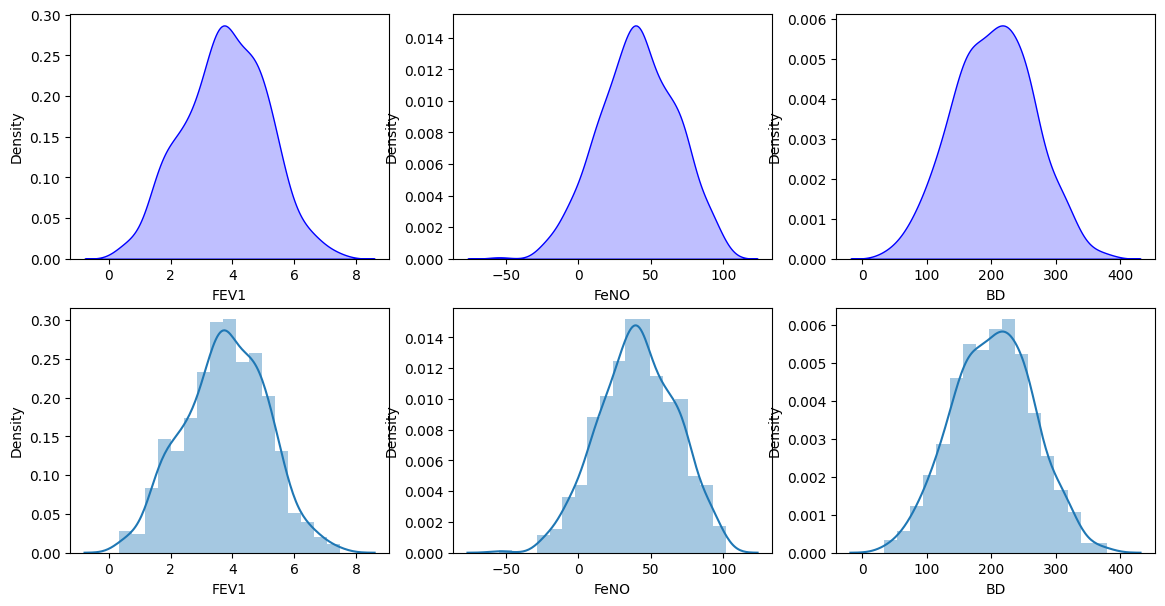

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(14, 7))
sns.kdeplot(df['FEV1'], shade=True, color="b", ax=axs[0, 0])
sns.kdeplot(df['FeNO'], shade=True, color="b", ax=axs[0, 1])
sns.kdeplot(df['BD'], shade=True, color="b", ax=axs[0, 2])
sns.distplot( a=df["FEV1"], hist=True, kde=True, rug=False, ax=axs[1, 0])
sns.distplot( a=df["FeNO"], hist=True, kde=True, rug=False, ax=axs[1, 1])
sns.distplot( a=df["BD"], hist=True, kde=True, rug=False, ax=axs[1, 2])
plt.show()

By visual inspection, our data seems to be close to the Gaussian distribution. We can double-check building qq-plots:

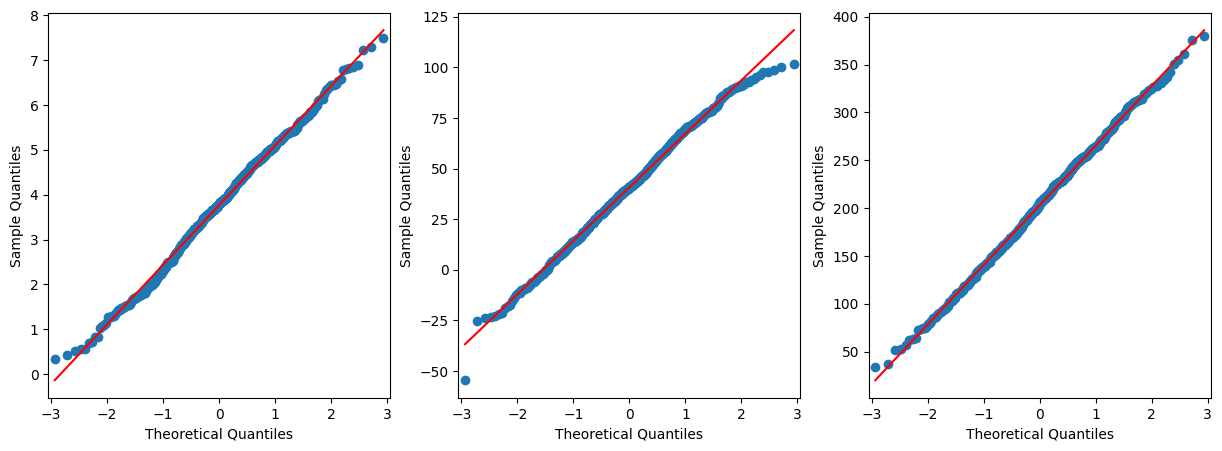

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
#q-q plot:
fig, axs = pyplot.subplots(1, 3, figsize=(15, 5))
qqplot(df['FEV1'], line='s', ax=axs[0])
qqplot(df['FeNO'], line='s', ax=axs[1])
qqplot(df['BD'], line='s', ax=axs[2])
pyplot.show()

We don’t have a perfect normal distribution for our variables, but we are close enough and able to use them. To explore our data set and the correlations between variables, we will build a pair-plot:

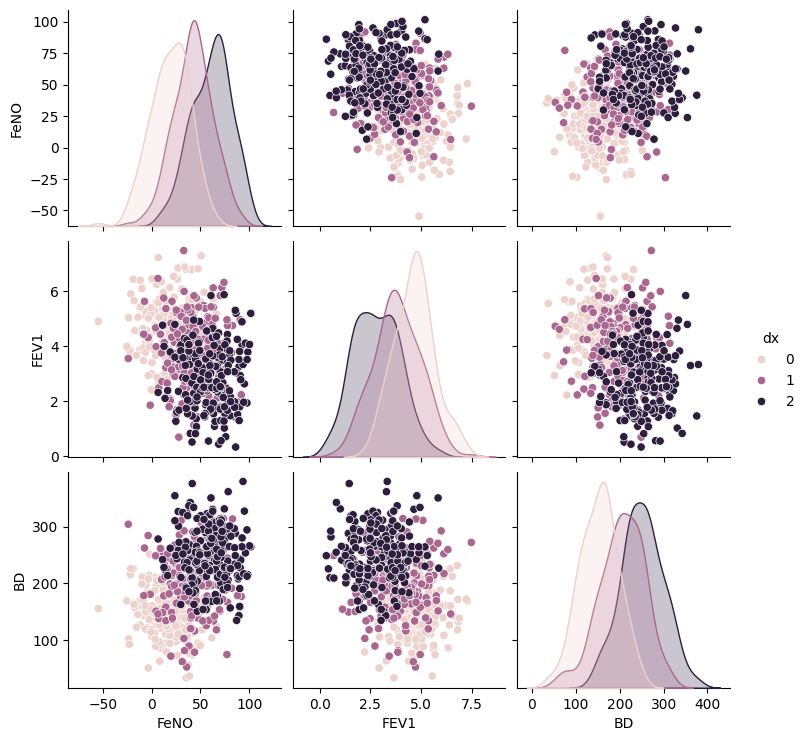

In [ ]:
#Exploring dataset:
sns.pairplot(df, kind="scatter", hue="dx")
plt.show()

Normal distribution has a mathematical equation that defines the probability of one observation of being in one of the groups. The formula is:




\begin{align*}
P(x_i|y) &= \frac{1}{\sqrt{2\pi\sigma_{yi}^2}} \exp\left(-\frac{(x_i - \mu_{yi})^2}{2\sigma_{yi}^2}\right)
\end{align*}

Where μ is mean and σ is standard deviation.

We can create a function to compute this probability:

In [ ]:
#Creating a Function:
def normal_dist(x , mean , sd):
      prob_density = (1/sd*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mean)/sd)**2)
      return prob_density

  If we know the normal distribution formula, we can manually compute the probability of observation to be in one of the three groups. First, we need to compute the mean and standard deviation for all predictive parameters and groups:

In [ ]:
#Group 0:
group_0 = df[df['dx'] == 0]
print('Mean FEV1 group 0: ', statistics.mean(group_0['FEV1']))
print('SD FEV1 group 0: ', statistics.stdev(group_0['FEV1']))
print('Mean FeNO group 0: ', statistics.mean(group_0['FeNO']))
print('SD FeNO group 0: ', statistics.stdev(group_0['FeNO']))
print('Mean BD group 0: ', statistics.mean(group_0['BD']))
print('SD BD group 0: ', statistics.stdev(group_0['BD']))
#Group 1:
group_1 = df[df['dx'] == 1]
print('Mean FEV1 group 1: ', statistics.mean(group_1['FEV1']))
print('SD FEV1 group 1: ', statistics.stdev(group_1['FEV1']))
print('Mean FeNO group 1: ', statistics.mean(group_1['FeNO']))
print('SD FeNO group 1: ', statistics.stdev(group_1['FeNO']))
print('Mean BD group 1: ', statistics.mean(group_1['BD']))
print('SD BD group 1: ', statistics.stdev(group_1['BD']))
#Group 2:
group_2 = df[df['dx'] == 2]
print('Mean FEV1 group 2: ', statistics.mean(group_2['FEV1']))
print('SD FEV1 group 2: ', statistics.stdev(group_2['FEV1']))
print('Mean FeNO group 2: ', statistics.mean(group_2['FeNO']))
print('SD FeNO group 2: ', statistics.stdev(group_2['FeNO']))
print('Mean BD group 2: ', statistics.mean(group_2['BD']))
print('SD BD group 2: ', statistics.stdev(group_2['BD']))

Mean FEV1 group 0:  4.661231263859472
SD FEV1 group 0:  0.9928910962444416
Mean FeNO group 0:  19.172215961672283
SD FeNO group 0:  20.046030150193964
Mean BD group 0:  152.53202498674227
SD BD group 0:  43.50950821654832
Mean FEV1 group 1:  3.8184386803203045
SD FEV1 group 1:  1.1637360828755727
Mean FeNO group 1:  42.2266931015317
SD FeNO group 1:  20.221581321043715
Mean BD group 1:  204.83532264340948
SD BD group 1:  50.80031651536976
Mean FEV1 group 2:  2.8153048624459256
SD FEV1 group 2:  1.1291830657324171
Mean FeNO group 2:  61.004676631233295
SD FeNO group 2:  20.3218693086181
Mean BD group 2:  251.57035274475274
SD BD group 2:  47.910530539214605


Now, using an example observation with:


```
FEV1 = 2.75
FeNO = 27
BD = 125
```



In [ ]:
#Probability for:
#FEV1 = 2.75
#FeNO = 27
#BD = 125
#We have the same number of observations, so the general probability is: 0.33
Prob_geral = round(0.333, 3)
#Prob FEV1:
Prob_FEV1_0 = round(normal_dist(2.75, 4.70, 1.08), 10)
print('Prob FEV1 0: ', Prob_FEV1_0)
Prob_FEV1_1 = round(normal_dist(2.75, 3.70, 1.13), 10)
print('Prob FEV1 1: ', Prob_FEV1_1)
Prob_FEV1_2 = round(normal_dist(2.75, 3.01, 1.22), 10)
print('Prob FEV1 2: ', Prob_FEV1_2)
#Prob FeNO:
Prob_FeNO_0 = round(normal_dist(27, 19.71, 19.29), 10)
print('Prob FeNO 0: ', Prob_FeNO_0)
Prob_FeNO_1 = round(normal_dist(27, 42.34, 19.85), 10)
print('Prob FeNO 1: ', Prob_FeNO_1)
Prob_FeNO_2 = round(normal_dist(27, 61.78, 21.39), 10)
print('Prob FeNO 2: ', Prob_FeNO_2)
#Prob BD:
Prob_BD_0 = round(normal_dist(125, 152.59, 50.33), 10)
print('Prob BD 0: ', Prob_BD_0)
Prob_BD_1 = round(normal_dist(125, 199.14, 50.81), 10)
print('Prob BD 1: ', Prob_BD_1)
Prob_BD_2 = round(normal_dist(125, 256.13, 47.04), 10)
print('Prob BD 2: ', Prob_BD_2)
#Compute probability:
Prob_group_0 = Prob_geral*Prob_FEV1_0*Prob_FeNO_0*Prob_BD_0
print('Prob group 0: ', Prob_group_0)
Prob_group_1 = Prob_geral*Prob_FEV1_1*Prob_FeNO_1*Prob_BD_1
print('Prob group 1: ', Prob_group_1)
Prob_group_2 = Prob_geral*Prob_FEV1_2*Prob_FeNO_2*Prob_BD_2
print('Prob group 2: ', Prob_group_2)

Prob FEV1 0:  0.4547361401
Prob FEV1 1:  1.5578800576
Prob FEV1 2:  2.0084810206
Prob FeNO 0:  0.1209886484
Prob FeNO 1:  0.0936798389
Prob FeNO 2:  0.0312444866
Prob BD 0:  0.0428557892
Prob BD 1:  0.0170137929
Prob BD 2:  0.0010944608
Prob group 0:  0.0007851593862437786
Prob group 1:  0.0008268477115218959
Prob group 2:  2.287102189816393e-05


`The results prove that our observation with the values FEV1 = 2.75, FeNO = 27, and BD = 125 has a higher probability of being in group two. While these steps are highly educational and great for learning, they are time-consuming. `

## Multinomial Naïve Bayes

Multinomial Naive Bayes is a probabilistic classifier to calculate the probability distribution of text data, which makes it well-suited for data with features that represent discrete frequencies or counts of events in various natural language processing (NLP) tasks.

The term “multinomial” refers to the type of data distribution assumed by the model. The features in text classification are typically word counts or term frequencies. The multinomial distribution is used to estimate the likelihood of seeing a specific set of word counts in a document.



Here are the steps for applying Multinomial Naive Bayes to NLP problems:

***`Preprocessing the text data:`*** The text data needs to be preprocessed before applying the algorithm. This involves steps such as tokenization, stop-word removal, stemming, and lemmatization.

***`Feature extraction:`***The text data needs to be converted into a feature vector format that can be used as input to the MNB algorithm. The most common method of feature extraction is to use a bag-of-words model, where each document is represented by a vector of word frequency counts.

***`Splitting the data:`*** The data needs to be split into training and testing sets. The training set is used to train the MNB model, while the testing set is used to evaluate its performance.

***`Training the MNB model:`*** The MNB model is trained on the training set by estimating the probabilities of each feature given each class. This involves calculating the prior probabilities of each class and the likelihood of each feature given each class.

***`Evaluating the performance of the model:`*** The performance of the model is evaluated using metrics such as accuracy, precision, recall, and F1-score on the testing set.

***`Using the model to make predictions:`*** Once the model is trained, it can be used to make predictions on new text data. The text data is preprocessed and transformed into the feature vector format, which is then input to the trained model to obtain the predicted class label.

  MNB is a simple and efficient algorithm that works well for many NLP problems such as sentiment analysis, spam detection, and topic classification. However, it has some limitations, such as the assumption of independence between features, which may not hold true in some cases. Therefore, it is important to carefully evaluate the performance of the model before using it in a real-world application.



Let’s consider an example, classify the review whether it is positive or negative.
Training Dataset:





| Text                                                         | Reviews  |
|--------------------------------------------------------------|----------|
| "I liked the movie"                                         | positive |
| "It’s a good movie. Nice story"                             | positive |
| "Nice songs. But sadly boring ending."                       | negative |
| "Hero’s acting is bad but heroine looks good. Overall nice movie" | positive |
| "Sad, boring movie"                                         | negative |

We classify whether the text “overall liked the movie” has a positive review or a negative review. We have to calculate,
P(positive | overall liked the movie) — the probability that the tag of a sentence is positive given that the sentence is “overall liked the movie”.
P(negative | overall liked the movie) — the probability that the tag of a sentence is negative given that the sentence is “overall liked the movie”.
Before that, first, we apply Removing Stopwords and Stemming in the text.
Removing Stopwords: These are common words that don’t really add anything to the classification, such as an able, either, else, ever and so on.
Stemming: Stemming to take out the root of the word.

Now After applying these two techniques, our text becomes:

| Text                                            | Reviews  |
|-------------------------------------------------|----------|
| "ilikedthemovi"                                | positive |
| "itsagoodmovienicestori"                       | positive |
| "nicesongsbutsadlyboringend"                   | negative |
| "herosactingisbadbutheroinelooksgoodoverallnicemovi" | positive |
| "sadboringmovi"                                | negative |


***`Feature Engineering: `***
The important part is to find the features from the data to make machine learning algorithms works. In this case, we have text. We need to convert this text into numbers that we can do calculations on. We use word frequencies. That is treating every document as a set of the words it contains. Our features will be the counts of each of these words.
In our case, we have P(positive | overall liked the movie), by using this theorem:

$$
P(\text{positive} | \text{overall liked the movie}) = \frac{P(\text{overall liked the movie} | \text{positive}) \times P(\text{positive})}{P(\text{overall liked the movie})}
$$

Since for our classifier we have to find out which tag has a bigger probability, we can discard the divisor which is the same for both tags,
P(overall liked the movie | positive)* P(positive) with P(overall liked the movie | negative) * P(negative)
There’s a problem though: “overall liked the movie” doesn’t appear in our training dataset, so the probability is zero. Here, we assume the ‘naive’ condition that every word in a sentence is independent of the other ones. This means that now we look at individual words.
We can write this as:
$$
P(\text{overall liked the movie}) = P(\text{overall}) \times P(\text{liked}) \times P(\text{the}) \times P(\text{movie})
$$

The next step is just applying the Bayes theorem:-


$$
P(\text{overall liked the movie} | \text{positive}) = P(\text{overall} | \text{positive}) \times P(\text{liked} | \text{positive}) \times P(\text{the} | \text{positive}) \times P(\text{movie} | \text{positive})
$$

And now, these individual words actually show up several times in our training data, and we can calculate them

***`Calculating probabilities:`***
First, we calculate the a priori probability of each tag: for a given sentence in our training data, the probability that it is positive P(positive) is 3/5. Then, P(negative) is 2/5.
Then, calculating P(overall | positive) means counting how many times the word “overall” appears in positive texts (1) divided by the total number of words in positive (17). Therefore, P(overall | positive) = 1/17, P(liked/positive) = 1/17, P(the/positive) = 2/17, P(movie/positive) = 3/17.
If probability comes out to be zero then By using Laplace smoothing: we add 1 to every count so it’s never zero. To balance this, we add the number of possible words to the divisor, so the division will never be greater than 1. In our case, the total possible words count are 21.

    Applying smoothing, the results are:

| Word    | P(word \| positive)    | P(word \| negative)    |
|---------|------------------------|------------------------|
| overall | 1 + 1/17 + 21          | 0 + 1/7 + 21           |
| liked   | 1 + 1/17 + 21          | 0 + 1/7 + 21           |
| the     | 2 + 1/17 + 21          | 0 + 1/7 + 21           |
| movie   | 3 + 1/17 + 21          | 1 + 1/7 + 21           |

Now we just multiply all the probabilities, and see who is bigger:



P(overall | positive) * P(liked | positive) * P(the | positive) * P(movie | positive) * P(positive ) = 1.38 * 10^{-5} = 0.0000138
P(overall | negative) * P(liked | negative) * P(the | negative) * P(movie | negative) * P(negative) = 0.13 * 10^{-5} = 0.0000013

Our classifier gives “overall liked the movie” the positive tag.


***`Below is the implementation : `***








In [ ]:
# cleaning texts
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

dataset = [["I liked the movie", "positive"],
		["It’s a good movie. Nice story", "positive"],
		["Hero’s acting is bad but heroine looks good.\
			Overall nice movie", "positive"],
			["Nice songs. But sadly boring ending.", "negative"],
			["sad movie, boring movie", "negative"]]

dataset = pd.DataFrame(dataset)
dataset.columns = ["Text", "Reviews"]

nltk.download('stopwords')

corpus = []

for i in range(0, 5):
	text = re.sub('[^a-zA-Z]', '', dataset['Text'][i])
	text = text.lower()
	text = text.split()
	ps = PorterStemmer()
	text = ''.join(text)
	corpus.append(text)

# creating bag of words model
cv = CountVectorizer(max_features = 1500)

X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# splitting the data set into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)



In [ ]:
# fitting multinomial naive bayes to the training set
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# predicting test set results
y_pred = classifier.predict(X_test)


# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[0 0]
 [2 0]]


## Another Detailed Example and Implementation
#### Along with comparison

The probability mass function (PMF) of the Multinomial distribution is used to model the likelihood of observing a specific set of word counts in a document. It is given by:



$P(D \mid c)=\frac{T_{c} !}{\Pi_{i=1}^V\left(x_i!\right)} \Pi_{i=1}^V\left(\frac{\theta_{c,i}^{x_i}}{x_i!}\right)$

here,

- $T_c$ is the total number of words in documents of class $c$.

- $x_i$ is the count of word $i$ in document $D$.

- $\theta_{c, i}$ is the probability of word $i$ occurring in a document of class $c$.

Let’s understand Multinomial Naive Bayes with text classification. Suppose, we have to classify a document as either to class ‘Spam’ or ‘Not Spam’ and vocabulary contains 3 words: {buy, now, free} and to classify a new document with the word counts.

The notations are provided below:
- c: Class (Spam or Not Spam)
- D: Document

- $w_i$: Word in the vocabulary

- $x_i$: Count of the word $w_i$ in the document $\mathrm{D}$

- $T_c$: Total number of words in documents of class $\mathrm{c}$

- $\theta_{c, i}$: Probability of word $w_i$
occurring the document of class $c$

Suppose in the training data, we have the following counts for each word in each class:

| Class     | buy | now | free | Total Words |
|-----------|-----|-----|------|-------------|
| Spam      | 20  | 5   | 10   | 35          |
| Not Spam  | 5   | 15  | 5    | 25          |

The MLE estimate of $\theta_{c, i}$ is calculated as:
$$
\theta_{c, i}=\frac{\operatorname{count}\left(w_i, c\right)+1}{\sum_w\left(\operatorname{count}\left(w_i, c\right)+1\right)}
$$
here,

- $\operatorname{count}\left(w_i, c\right)$ is the number of times word $i$ appears in the document of class $C$
- The " +1 " term is for additive smoothing (Laplace Smoothing), which helps handle the issue of zero probabilities for unseen words.

We have calculated the probabilities of each word given the class, Maximum Likelihood Estimation (MLE) for $\theta_{c, i}$ :

MLE for word 'buy'
$\theta_{\text {Spam }, \text { Buy }}=\frac{20+1}{35+3}=\frac{21}{38}$


Similarly, calculate MLE for for other words.
Classification of a New Document
Now let's classify the new document with word counts $\{$ buy: 1, now:0, free: 2$\}$

When, we classify a new document, the likelihood of the document given a class is calculated using the product of these individual word probabilities:
$$
P(D \mid c)=\prod_{i=1}^V \theta_{c, i}^{x_i}
$$
- Likelihood calculation:
- $P($ DSpam $)=\left(\frac{21}{38}\right)^1 *\left(\frac{5}{38}\right)^0 *\left(\frac{10}{38}\right)^2$
- $P($ DNotSpam $)=\left(\frac{6}{28}\right)^1 *\left(\frac{15}{28}\right)^0 *\left(\frac{5}{28}\right)^2$

The likelihood term is then used in conjunction with prior probabilities in the Naive Bayes formula to determine the posterior probability of the class given the document:
$$
P(c \mid D)=\frac{P(c) \cdot P(D \mid c)}{P(D)}
$$
- Applying Bayes' theorem to calculate the posterior of each class:
- $P(\operatorname{Spam} \mid D)=\frac{P(D \mid \operatorname{Spam}) . P(\text { Spam })}{P(D)}$
- $P($ NotSpam $\mid D)=\frac{P(D \mid \text { NotSpam }) . P(\text { NotSpam })}{P(D)}$

After comparing the posterior probabilities and we classify the document into the class with the higher probability.

### How Multinomial Naive Bayes differs from Gaussian Naive Bayes?

|                       Multinomial Naive Bayes                     |                Gaussian Naive Bayes                |
|-------------------------------------------------------------------|---------------------------------------------------|
| It is specially designed for discrete data, particularly text data. | It is suitable for continuous data where features are real-valued and follow a Gaussian distribution. |
| It assumes features represent counts or frequencies of events (like word counts). | It assumes a Gaussian distribution for the likelihood. |
| It is commonly used in NLP for document classification tasks.      | Less commonly used in text classification tasks because it’s not well-suited for count-based, discrete features. |


### Step-by-step implementation

In [ ]:
!pip install Scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juhatasnia","key":"970a6a16a94552c0b4c97b16ae89b70b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


In [ ]:
import kaggle

# Download the dataset
kaggle.api.authenticate()
kaggle.api.dataset_download_files('uciml/sms-spam-collection-dataset', path='.', unzip=True)

# Load the dataset
sms_data = pd.read_csv("spam.csv", encoding='latin-1')

# Preprocess the data
sms_data = sms_data[['v1', 'v2']]
sms_data = sms_data.rename(columns={'v1': 'label', 'v2': 'text'})

# Split the data into features and labels
X = sms_data['text']
y = sms_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


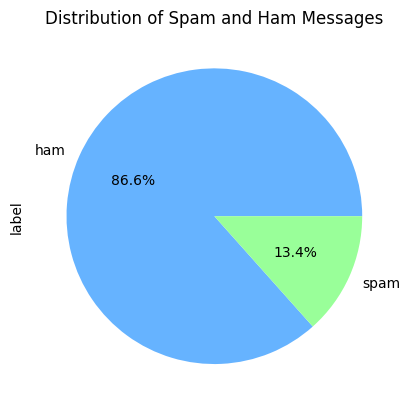

In [ ]:
# EDA 1: Distribution of Classes
class_distribution = sms_data['label'].value_counts()
class_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Spam and Ham Messages')
plt.show()


Model Training
Before training models we need to vectorize the text data to convert it to numerical dataset. To do this we will use Count Vectorizer. After that we will train Multinomial NB and also Gaussian NB to show comparative performance. We need to specify some of the Hyperparameters of MNB which are discussed below:

***`alpha:`*** It is the Laplace smoothing parameter which is used to avoid zero probabilities in cases where a feature doesn’t occur in a particular class in the training data. A higher value of alpha results in less aggressive smoothing which allows the model to be more sensitive to the training data.
fit_prior: This is a Boolean parameter (True/False) which determines whether to learn class prior probabilities or not. We will set it to ‘True’ so that it assumes uniform prior probabilities for classes.

***`force_alpha:`*** This is also a Boolean parameter (True/False) which forces the alpha to be added to the sample counts and smoothed if it is set to ‘True’.

In [ ]:
# Create a CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
mnb = MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True)
mnb.fit(X_train_vec, y_train)

# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_vec.toarray(), y_train)


GaussianNB()

In [ ]:
# Evaluate the models using accuracy and F1-score
y_pred_mnb = mnb.predict(X_test_vec)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
f1_mnb = f1_score(y_test, y_pred_mnb, pos_label='spam')

y_pred_gnb = gnb.predict(X_test_vec.toarray())
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb, pos_label='spam')

# Print the results
print("Multinomial Naive Bayes - Accuracy:", accuracy_mnb)
print("Multinomial Naive Bayes - F1-score for 'spam' class:", f1_mnb)

print("Gaussian Naive Bayes - Accuracy:", accuracy_gnb)
print("Gaussian Naive Bayes - F1-score for 'spam' class:", f1_gnb)


Multinomial Naive Bayes - Accuracy: 0.9838565022421525
Multinomial Naive Bayes - F1-score for 'spam' class: 0.9370629370629371
Gaussian Naive Bayes - Accuracy: 0.9004484304932735
Gaussian Naive Bayes - F1-score for 'spam' class: 0.7131782945736436


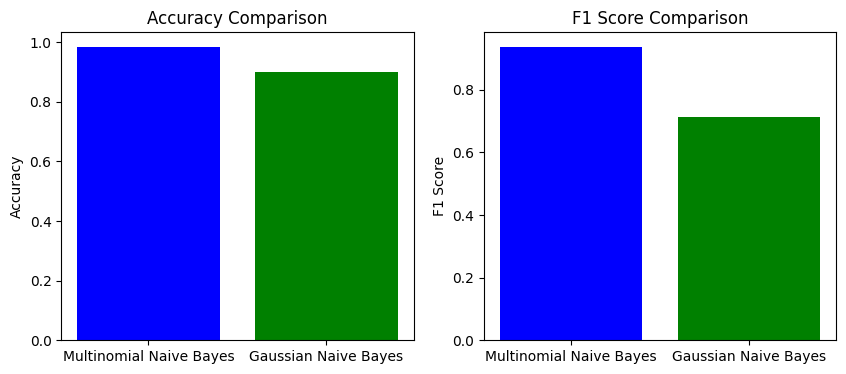

In [ ]:
methods = ['Multinomial Naive Bayes', 'Gaussian Naive Bayes']
accuracy_scores = [accuracy_mnb, accuracy_gnb]
f1_scores = [f1_mnb, f1_gnb]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(methods, accuracy_scores, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

plt.subplot(1, 2, 2)
plt.bar(methods, f1_scores, color=['blue', 'green'])
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')

plt.show()


    We can conclude that MNB is very efficient algorithm for NLP based tasks. Here MNB achieves a notable 98% of accuracy and 93.70% of F1-score which is far better than GNB where F1-score is less.



## Bernoulli Naïve Bayes


This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.

BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter).

The decision rule for Bernoulli naive Bayes is based on
$$
P\left(x_i \mid y\right)=P\left(x_i=1 \mid y\right) x_i+\left(1-P\left(x_i=1 \mid y\right)\right)\left(1-x_i\right)
$$
which differs from multinomial NB's rule in that it explicitly penalizes the non-occurrence of a feature $i$ that is an indicator for class $y$, where the multinomial variant would simply ignore a non-occurring feature.

In the case of text classification, word occurrence vectors (rather than word count vectors) may be used to train and use this classifier. BernoulliNB might perform better on some datasets, especially those with shorter documents. It is advisable to evaluate both models, if time permits.

**Implemented Model on the same Dataset and compared the results**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv", encoding= 'latin-1')
data = data[["class", "message"]]

In [ ]:
x = np.array(data["message"])
y = np.array(data["class"])

cv = CountVectorizer()
x = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

model = BernoulliNB(binarize=0.0)
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9782490483958673


In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Train a Bernoulli Naive Bayes classifier
bnb = BernoulliNB(alpha=1.0, binarize=None, fit_prior=True, class_prior=None)
bnb.fit(X_train_vec, y_train)


BernoulliNB(binarize=None)

In [ ]:
# Evaluate the Bernoulli Naive Bayes model
y_pred_bnb = bnb.predict(X_test_vec)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
f1_bnb = f1_score(y_test, y_pred_bnb, pos_label='spam')

# Print the results
print("Bernoulli Naive Bayes - Accuracy:", accuracy_bnb)
print("Bernoulli Naive Bayes - F1-score for 'spam' class:", f1_bnb)


Bernoulli Naive Bayes - Accuracy: 0.9775784753363229
Bernoulli Naive Bayes - F1-score for 'spam' class: 0.9090909090909091


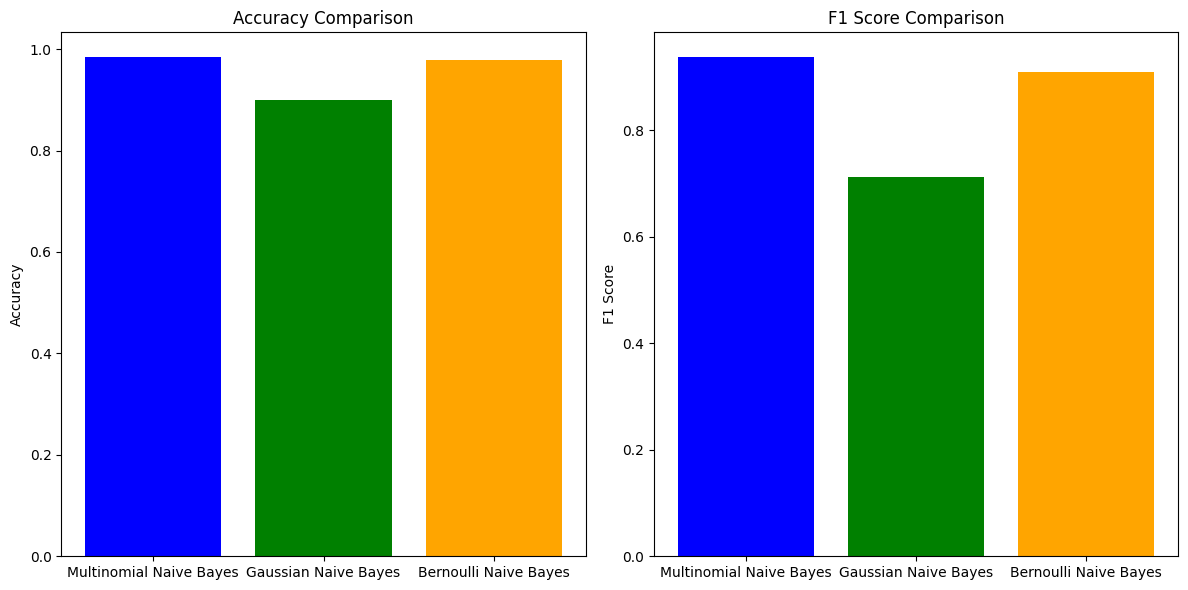

In [ ]:
# Add Bernoulli Naive Bayes results to the lists
methods.append('Bernoulli Naive Bayes')
accuracy_scores.append(accuracy_bnb)
f1_scores.append(f1_bnb)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(methods, accuracy_scores, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

plt.subplot(1, 2, 2)
plt.bar(methods, f1_scores, color=['blue', 'green', 'orange'])
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()


# References

[1](/https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c)

[2](https://medium.com/@rangavamsi5/naïve-bayes-algorithm-implementation-from-scratch-in-python-7b2cc39268b9)

[3](https://medium.com/analytics-vidhya/naive-bayes-classifier-a-beginners-guide-to-master-the-fastest-and-simplest-classification-d6a368e6b737)

[4](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)

[5](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download)

[6](https://medium.com/@evertongomede/understanding-multinomial-naive-bayes-classifier-fdbd41b405bf)

[7](https://builtin.com/artificial-intelligence/gaussian-naive-bayes)

[8](https://www.geeksforgeeks.org/applying-multinomial-naive-bayes-to-nlp-problems/)

[9](https://medium.com/@evertongomede/understanding-multinomial-naive-bayes-classifier-fdbd41b405bf)

[10](https://www.geeksforgeeks.org/multinomial-naive-bayes/)

[11](https://thecleverprogrammer.com/2021/07/27/bernoulli-naive-bayes-in-machine-learning/)